<a href="https://colab.research.google.com/github/Cheatcode33/Cheatcode33/blob/main/Copy_of_Healthcare_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Healthcare Analytics Capstone Project  

#### <span style="color:navy"> Case Study to improve the CMS Hospital rating for Evanston Hospital, IL

# **Problem Statement**
Evanston Hospital is a comprehensive acute-care facility in Illinois, US. The hospital offers a wide range of services and surgical specialities, in addition to having high-end lab capabilities. Despite spending a considerable amount of resources on improving its services, the hospital’s CMS rating has remained at 3 for the past 5 years, and this has led to a steady decline in revenue for the hospital. For hospitals like Evanston, these ratings directly influence the choice made by consumers who are looking for a healthcare provider and would, therefore, have a significant impact on the hospitals’ revenues. As a consulting company hired by Evanston, our task is to identify possible root causes for the hospital getting such an average rating and recommend measures to mitigate this problem.


### **Solution Methodology**
The broad solution methodology that needs to be followed in this Capstone project is as follows: Use the concepts of structured problem-solving to identify potential root causes for the issues faced by Evanston Hospital Build a rating prediction model of past hospital data as a proof of concept Steps:

Understanding the data, cleaning it and preparing it for further analysis
Performing univariate/bivariate analysis and feature engineering
Training different machine learning models on the data
Choosing and evaluating the model that provides the best metrics
Data storytelling using the insights and modelling results, and proposing a business solution

## <span style="color:navy"> 1. Import Data and Initial Analysis

###  <span style="color:navy"> 1.1 Import Libraries

In [ ]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 999

%matplotlib inline

###  <span style="color:navy"> 1.2 Data Import - Hospital General Information

In [ ]:
# Hospital General Information Dataset. This Dataset contains the Target Variable - The final Hospital overall rating

df_hosp = pd.read_csv('../input/hospitaldata/Hospital General Information.csv', encoding='cp1252')
df_hosp.columns = df_hosp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_hosp.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN


In [ ]:
# df_hosp.columns

In [ ]:
# To drop all the footnote columns
footnote_filter = df_hosp.filter(regex='footnote').columns
print (footnote_filter)

df_hosp = df_hosp[df_hosp.columns.drop(footnote_filter)]
df_hosp.head(3)

Index(['hospital_overall_rating_footnote',
       'mortality_national_comparison_footnote',
       'safety_of_care_national_comparison_footnote',
       'readmission_national_comparison_footnote',
       'patient_experience_national_comparison_footnote',
       'effectiveness_of_care_national_comparison_footnote',
       'timeliness_of_care_national_comparison_footnote',
       'efficient_use_of_medical_imaging_national_comparison_footnote'],
      dtype='object')


,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average


In [ ]:
df_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   provider_id                                           4818 non-null   int64 
 1   hospital_name                                         4818 non-null   object
 2   address                                               4818 non-null   object
 3   city                                                  4818 non-null   object
 4   state                                                 4818 non-null   object
 5   zip_code                                              4818 non-null   int64 
 6   county_name                                           4803 non-null   object
 7   phone_number                                          4818 non-null   int64 
 8   hospital_type                                         4818 non-null 

###  <span style="color:navy"> 1.3 Data Analysis - Hospital General Information

#### 3.1 Identify the number of unique features in a column

In [ ]:
# Look at the number of unique categories in a column
def unique_count(data):
    data_type = data.dtypes
    unique_count = data.nunique()

    unique_count_df = pd.DataFrame({'data_type': data_type,
                                 'unique_count': unique_count})
    return unique_count_df

In [ ]:
unique_count(df_hosp).transpose() # Used transpose so as to avoid using more space. `

NameError: ignored

#### 1.3.2 To convert all comparison columns to values
* 'Above the National average': 3,
* 'Same as the National average': 2,
* 'Below the National average': 1,
* 'Not Available': 0

In [ ]:
# To convert all comparison columns to values
comparison_filter = df_hosp.filter(regex='comparison').columns

for k in comparison_filter:
    print(f'{k} \n-----------------------------------------------------')
    print(df_hosp[k].unique())

In [ ]:
# Convert the categorical values to numercial values
# value_counts is checked each time to ensure the mapping is done only once
# If mapped multiple times, the values are converted to NaNs

df = df_hosp
comparison_dict = {'Above the National average': 3,
                   'Same as the National average': 2,
                   'Below the National average': 1,
                   'Not Available': 0}

for k in comparison_filter:
    if df[k].value_counts().values.sum() > 0:  # To check if the step was already completed
        df[k] = df[k].map(comparison_dict)
        print (f'Mapping is completed for {k}')

In [ ]:
df_hosp.head(3)

#### 1.3.3 Plot the percentages for the comparison ratings for Hospital star ratings.

In [ ]:
# Plot the percentages for the comparison ratings for Hospital star ratings.

df = df_hosp.loc[df_hosp['hospital_overall_rating'] != 'Not Available']

sns.set_style('darkgrid')
for k in comparison_filter:
    x,y = 'hospital_overall_rating', k
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=6, aspect=1.5, dodge=True)
    g.ax.set_ylim(0,100)
    g.ax.set(xlabel = 'Hospital Overall Rating', ylabel = 'Count Percent')
    g.ax.set_title(k)
    for p in g.ax.patches:
        txt_x = np.nan_to_num(p.get_x())
        y_val = np.nan_to_num(p.get_height())
        txt_y = y_val + 1
        txt = str(y_val.round(2)) + '%'
        g.ax.text(txt_x,txt_y,txt)

NameError: ignored

#### Observations:
The below are the observations from Plotting the percentages for the National comparison ratings for different measures.

1. **Mortality Measures** - 29% of all the 5 star Hospitals have a Mortality measure greater than the National Average. For 39% of all 5 star hospitals the Mortality measures comparison is not available. This indicates that when present, the 5 star Hospitals have a higher Mortality measure score
2. **Safety Measures** - About 78% of 1 Star Hospitals have less than National Average and 64% of 5 star hospitals have higher then National average for Safety scores. This clearly indicates that a higher Safety score leads to better start rating.
3. **Readmission Score** - 1 and 2 star hospitals have very high percent for less than National average and conversely 4 and 5 star hospitals have high percent of more than National average. Higher Readmission measures clearly contribute to better star ratings.
4. **Patient Experience** - 65% of 4 start hospitals and a staggering 89% of 5 star hospitals have more than average Patient experience score and none have less than average Patient experience score. This clearly indicates that the Patient Experience score attributes more towards the star rating.
5. **Effectiveness Measures**, Timeliness Measures and Efficient use of imaging measures - For these three measures, the percent of hospitals with scores same as National average is high and there is not much difference between the ratings. These scores seems to contribute lesser towards the start rating as is expected from the 4% weightage given to these measures.   

#### 1.3.4 Plot the Number of Hopitals by State.

In [ ]:
Total_state = pd.value_counts(df_hosp['state'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

Total_state.columns = ['State', 'Number of Hospitals']

In [ ]:
# Plot the number of Hospitals by State

dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Number of Hospitals', y = 'State', data = Total_state)
ax.set(xlabel = 'Number of Hospitals', ylabel = 'States')
ax.set_title('Number of Hospitals per State')


#### 1.3.5 Plot the Number of Hopitals by Hospital Types.

In [ ]:
Hospital_Type_df = pd.value_counts(df_hosp['hospital_type'])
Hospital_Type_df = pd.DataFrame(Hospital_Type_df)
Hospital_Type_df = Hospital_Type_df.reset_index()
Hospital_Type_df.columns = ['Hospital Type', 'Number of Hospitals']

In [ ]:
# Plot the number of Hospitals by Hospital Types

ax = sns.barplot(x = 'Hospital Type', y= 'Number of Hospitals', data = Hospital_Type_df)
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospitals(Acute/Critical/Childrens)')

#### 1.3.6 Plot the Number of Hopitals by Hospital Owner

In [ ]:
Hospital_owner = pd.value_counts(df_hosp['hospital_ownership'])
Hospital_owner = pd.DataFrame(Hospital_owner)
Hospital_owner = Hospital_owner.reset_index()
Hospital_owner.columns = ['Hospital Ownership', 'Number of Hospitals']

In [ ]:
#  Plot the Number of Hopitals by Hospital Owner

dims = (10,6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(y = 'Hospital Ownership', x= 'Number of Hospitals', data = Hospital_owner)
ax.set(xlabel = 'Hospital Ownership', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

#### 1.3.7 Plot the Distribution of Hospital Rating

In [ ]:
df_hosp['hospital_overall_rating'].unique()

In [ ]:
Hospital_rating = df_hosp.drop(df_hosp[df_hosp['hospital_overall_rating']=='Not Available'].index)
Hospital_rating['hospital_overall_rating'].unique()

In [ ]:
Hospital_rating = pd.value_counts(Hospital_rating['hospital_overall_rating'])
Hospital_rating = pd.DataFrame(Hospital_rating)

Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['Hospital Rating', 'Number of Hospitals']

In [ ]:
# Plot the Distribution of Hospital Rating

dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Hospital Rating', y = 'Number of Hospitals', palette='Blues',data = Hospital_rating)
ax.set(xlabel = 'Hospital Rating', ylabel = 'Number of Hospitals')

#### Observations:

The Distribution of star ratings seem to follow a normal distribution

In [ ]:
for k in df_hosp['provider_id'].value_counts():
    if k!=1:
        print(k)

-------------

## <span style="color:navy"> 2. Data Merging and Master Data creation

#### Creating a Master dataset to merge all the required table data into one
The Hospital General Information Dataset is considered as the master and the other datasets are merged with this.


###  <span style="color:navy"> 2.1 Copy Hospital General information to master and pre-process

In [ ]:
# Create a Master dataset to merge all the required table data into one

df_master = df_hosp.copy()

In [ ]:
df_master.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,2,3,2,1,2,2,2
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,1,2,3,2,2,3,1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,1,2,2,1,2,3,2


In [ ]:
# df_master.columns

In [ ]:
# Drop columns from master dataset that are not needed for analysis

dropcols = ['hospital_name', 'address', 'city', 'state', 'zip_code',
            'county_name', 'phone_number', 'hospital_type', 'hospital_ownership']

df_master = df_master.drop(dropcols, axis=1)
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
0,10001,Yes,Y,3,2,3,2,1,2,2,2
1,10005,Yes,Y,3,1,2,3,2,2,3,1
2,10006,Yes,Y,2,1,2,2,1,2,3,2


In [ ]:
# Checking the NA/Null values are present or Not

def check_missing(data):
    count_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = round((data.isnull().sum() * 100 / len(data)), 2).sort_values(ascending=False)
    missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                     'percent_missing': percent_missing})
    return missing_value_df

###  <span style="color:navy"> 2.2 Merge Total Performance Score to Master dataset

In [ ]:
df_tps = pd.read_csv('../input/hospitaldata/hvbp_tps_08_26_2016.csv')
df_tps.columns = df_tps.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_tps.head(3)

,provider_number,hospital_name,address,city,state,zip_code,county_name,unweighted_normalized_clinical_process_of_care_domain_score,weighted_clinical_process_of_care_domain_score,unweighted_patient_experience_of_care_domain_score,weighted_patient_experience_of_care_domain_score,unweighted_normalized_outcome_domain_score,weighted_outcome_domain_score,unweighted_normalized_efficiency_domain_score,weighted_efficiency_domain_score,total_performance_score
0,230002,ST MARY MERCY HOSPITAL,36475 FIVE MILE ROAD,Livonia,MI,48154,WAYNE,71.428571428571,07.142857142857,40.000000000000,10.000000000000,57.142857142857,22.857142857143,10.000000000000,02.500000000000,42.500000
1,230015,THREE RIVERS HEALTH,701 S HEALTH PARKWAY,Three Rivers,MI,49093,ST. JOSEPH,16.666666666667,01.666666666667,35.000000000000,08.750000000000,30.000000000000,12.000000000000,00.000000000000,00.000000000000,22.416667
2,230081,MUNSON HEALTHCARE CADILLAC HOSPITAL,400 HOBART ST,Cadillac,MI,49601,WEXFORD,58.571428571429,05.857142857143,64.000000000000,16.000000000000,70.000000000000,28.000000000000,60.000000000000,15.000000000000,64.857143


In [ ]:
df_tps[df_tps['provider_number'] == 180078]

,provider_number,hospital_name,address,city,state,zip_code,county_name,unweighted_normalized_clinical_process_of_care_domain_score,weighted_clinical_process_of_care_domain_score,unweighted_patient_experience_of_care_domain_score,weighted_patient_experience_of_care_domain_score,unweighted_normalized_outcome_domain_score,weighted_outcome_domain_score,unweighted_normalized_efficiency_domain_score,weighted_efficiency_domain_score,total_performance_score
42,180078,PAUL B HALL REGIONAL MEDICAL CENTER,625 JAMES S TRIMBLE BOULEVARD,Paintsville,KY,41240,JOHNSON,Not Available,Not Available,32.000000000000,08.888888888889,62.500000000000,27.777777777778,40.000000000000,11.111111111111,47.777778


In [ ]:
# df_tps.columns

In [ ]:
df = df_tps

df_tpsscore = pd.DataFrame({'provider_id':df.provider_number,
                            'tps_process': df.weighted_clinical_process_of_care_domain_score,
                            'tps_experience': df.weighted_patient_experience_of_care_domain_score,
                            'tps_outcome' : df.weighted_outcome_domain_score,
                            'tps_efficiency' : df.weighted_efficiency_domain_score,
                            'tps_score' : df.total_performance_score})

df_tpsscore = df_tpsscore.apply(pd.to_numeric, args=('coerce',))

In [ ]:
check_missing(df_tpsscore)

,count_missing,percent_missing
tps_process,161,5.33
tps_outcome,135,4.47
tps_experience,73,2.42
tps_efficiency,5,0.17
tps_score,0,0.00
provider_id,0,0.00


#### 2.2.1 Merge Hospital General Information and Total Performance Score

In [ ]:
# Merge all other Datasets with the master Dataset

df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
0,10001,Yes,Y,3,2,3,2,1,2,2,2
1,10005,Yes,Y,3,1,2,3,2,2,3,1
2,10006,Yes,Y,2,1,2,2,1,2,3,2


In [ ]:
# Merge tps data with Master Dataset

df_master = pd.merge(left=df_master, right=df_tpsscore, left_on='provider_id',right_on='provider_id', how='outer')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000


In [ ]:
check_missing(df_master).head()

,count_missing,percent_missing
tps_process,1960,40.68
tps_outcome,1934,40.14
tps_experience,1872,38.85
tps_efficiency,1804,37.44
tps_score,1799,37.34


In [ ]:
df_master[df_master['provider_id'] == 140010]

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score
1124,140010,Yes,Y,3,3,1,3,1,3,2,3,7.285714,4.25,28.571429,0.0,40.107143


#### 2.2.2 Plot the values from Total Performance Score with respect to Hospitals with Ratings 1 to 5
We select only the Hospitals with a overall rating present. Hospitals with Rating as Not Available canbe excluded for the plotting

In [ ]:
# We select only the Hospitals with a overall rating present.
# Hospitals with Rating as Not Available canbe excluded for the plotting
rating_df = df_master.loc[df_master['hospital_overall_rating'] != 'Not Available']
rating_df.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000


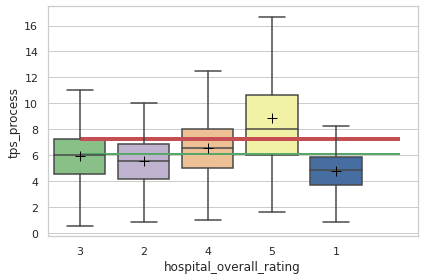

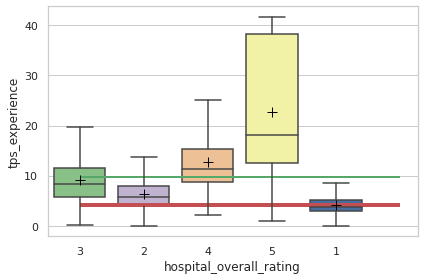

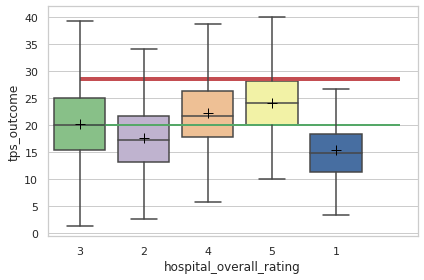

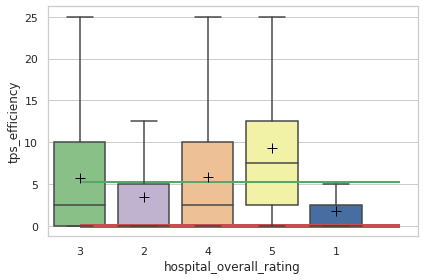

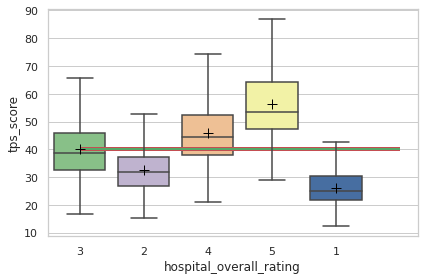

In [ ]:
# Uncomment Later

# Box plot to get the distribution of scores across the hospital ratings
# Frequency Ditribution for Numeric Features

plotcols = ['tps_process', 'tps_experience', 'tps_outcome', 'tps_efficiency', 'tps_score']

# sns.set(style='ticks',color_codes=True)
sns.set_style('whitegrid')
df = rating_df

for i, var in enumerate(plotcols):
    fig, ax = plt.subplots(figsize=(6,4))

    filtered_data = df[var][~np.isnan(df[var])]
    means = df.groupby('hospital_overall_rating')[var].mean().reset_index()
    value = df[df['provider_id']==140010][var]
    National_mean =  df[var].mean()

    sns.boxplot(x='hospital_overall_rating', y = filtered_data, data = df, palette='Accent',
                showmeans=True, showfliers = False,
                meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
    ax.hlines(y=value, xmin = 0, xmax =5, linewidth=4, color='r')
    ax.hlines(y=National_mean, xmin = 0, xmax =5, linewidth=2, color='g')

    plt.tight_layout()

###  <span style="color:navy"> 2.3 Create a function to merge the records:

In [ ]:
# Create a function to merge the records:

def merge_measures(df_master, df, cols, prefix):
    for k in cols:
        dfTemp = df[df.measure_id==k]

        # Strip two important columns.
        dfTemp = pd.DataFrame({'provider_id':dfTemp.provider_id, prefix+k:dfTemp.score.astype('float')})
        df_master = pd.merge(left=df_master, right=dfTemp, left_on='provider_id',right_on='provider_id', how='outer')
    return df_master

###  <span style="color:navy"> 2.4 Merge Mortality Measures to Master dataset

In [ ]:
df_mortRead = pd.read_csv('../input/hospitaldata/Readmissions and Deaths - Hospital.csv', encoding='cp1252')
df_mortRead.columns = df_mortRead.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_mortRead['score'] = df_mortRead['score'].apply(pd.to_numeric, args=('coerce',))
df_mortRead.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_name,measure_id,compared_to_national,denominator,score,lower_estimate,higher_estimate,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,7/1/2012,6/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,7/1/2012,6/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,7/1/2012,6/30/2015


In [ ]:
# Uncomment for analysis
# check_missing(df_mortRead).head()

In [ ]:
print (len(df_mortRead.measure_id.unique()))

# Uncomment for analysis
print (df_mortRead.measure_id.unique())

14
['MORT_30_AMI' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF' 'MORT_30_PN'
 'MORT_30_STK' 'READM_30_AMI' 'READM_30_CABG' 'READM_30_COPD'
 'READM_30_HF' 'READM_30_HIP_KNEE' 'READM_30_HOSP_WIDE' 'READM_30_PN'
 'READM_30_STK']


In [ ]:
mort_grpcols = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK']
print (mort_grpcols)

['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK']


#### 2.4.1 Measures decription for Mortality measures from Readmissions and Deaths – Hospital.csv data sheet

In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict1 = df_mortRead.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict1 = df_dataDict1[df_dataDict1['measure_id'].isin(mort_grpcols)]
df_dataDict1['measure_id'] = 'Mortality_' + df_dataDict1['measure_id'].astype(str)
df_dataDict1.head()

,measure_id,measure_name,size
0,Mortality_MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Morta...,4818
1,Mortality_MORT_30_CABG,Death rate for CABG,4818
2,Mortality_MORT_30_COPD,Death rate for chronic obstructive pulmonary d...,4818
3,Mortality_MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,4818
4,Mortality_MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,4818


#### 2.4.1 Merge Mortality measures from Readmissions and Deaths – Hospital.csv data sheet

In [ ]:
# Merge Mortality measures from Readmissions and Deaths – Hospital.csv data sheet
df_master = merge_measures(df_master, df_mortRead, mort_grpcols, 'Mortality_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9


In [ ]:
df_master[df_master['provider_id'] == 140010]

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK
1124,140010,Yes,Y,3,3,1,3,1,3,2,3,7.285714,4.25,28.571429,0.0,40.107143,11.2,2.2,5.7,9.5,13.0,12.5


In [ ]:
# Uncomment for analysis
# check_missing(df_master).head(10)

#### 2.4.2 Merge Mortality measures from Complications - Hospital.csv data sheet

In [ ]:
df_comp = pd.read_csv('../input/hospitaldata/Complications - Hospital.csv')
df_comp.columns = df_comp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_comp['score'] = df_comp['score'].apply(pd.to_numeric, args=('coerce',))
df_comp.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_name,measure_id,compared_to_national,denominator,score,lower_estimate,higher_estimate,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.80,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict2 = df_comp.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict2 = df_dataDict2[df_dataDict2['measure_id'] == 'PSI_4_SURG_COMP']
df_dataDict2['measure_id'] = 'Mortality_' + df_dataDict2['measure_id'].astype(str)
df_dataDict2

,measure_id,measure_name,size
6,Mortality_PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,4818


In [ ]:
#### Merge Mortality measures fromComplications - Hospital.csv data sheet
comp_cols = ['PSI_4_SURG_COMP']

df_master = merge_measures(df_master, df_comp, comp_cols, 'Mortality_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33


In [ ]:
df_master[df_master['provider_id'] == 140010]

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP
1124,140010,Yes,Y,3,3,1,3,1,3,2,3,7.285714,4.25,28.571429,0.0,40.107143,11.2,2.2,5.7,9.5,13.0,12.5,84.85


###  <span style="color:navy"> 2.5 Merge Safety Measures with Master Data

In [ ]:
df_hai = pd.read_csv('../input/hospitaldata/Healthcare Associated Infections - Hospital.csv')
df_hai.columns = df_hai.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_hai['score'] = df_hai['score'].apply(pd.to_numeric, args=('coerce',))
df_hai.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_name,measure_id,compared_to_national,score,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.030,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117.000,NaN,1/1/2015,12/31/2015


In [ ]:
df_hai.shape

(231264, 15)

In [ ]:
print(len(df_hai.measure_id.unique()))

# Uncomment for analysis
print (df_hai.measure_id.unique())

48
['HAI_1_CI_LOWER' 'HAI_1_CI_UPPER' 'HAI_1_DOPC_DAYS' 'HAI_1_ELIGCASES'
 'HAI_1_NUMERATOR' 'HAI_1_SIR' 'HAI_1a_CI_LOWER' 'HAI_1a_CI_UPPER'
 'HAI_1a_DOPC_DAYS' 'HAI_1a_ELIGCASES' 'HAI_1a_NUMERATOR' 'HAI_1a_SIR'
 'HAI_2_CI_LOWER' 'HAI_2_CI_UPPER' 'HAI_2_DOPC_DAYS' 'HAI_2_ELIGCASES'
 'HAI_2_NUMERATOR' 'HAI_2_SIR' 'HAI_2a_CI_LOWER' 'HAI_2a_CI_UPPER'
 'HAI_2a_DOPC_DAYS' 'HAI_2a_ELIGCASES' 'HAI_2a_NUMERATOR' 'HAI_2a_SIR'
 'HAI_3_CI_LOWER' 'HAI_3_CI_UPPER' 'HAI_3_DOPC_DAYS' 'HAI_3_ELIGCASES'
 'HAI_3_NUMERATOR' 'HAI_3_SIR' 'HAI_4_CI_LOWER' 'HAI_4_CI_UPPER'
 'HAI_4_DOPC_DAYS' 'HAI_4_ELIGCASES' 'HAI_4_NUMERATOR' 'HAI_4_SIR'
 'HAI_5_CI_LOWER' 'HAI_5_CI_UPPER' 'HAI_5_DOPC_DAYS' 'HAI_5_ELIGCASES'
 'HAI_5_NUMERATOR' 'HAI_5_SIR' 'HAI_6_CI_LOWER' 'HAI_6_CI_UPPER'
 'HAI_6_DOPC_DAYS' 'HAI_6_ELIGCASES' 'HAI_6_NUMERATOR' 'HAI_6_SIR']


In [ ]:
hai_grpcols = ['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR',
               'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR' ]

print (hai_grpcols)

['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict3 = df_hai.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict3 = df_dataDict3[df_dataDict3['measure_id'].isin(hai_grpcols)]
df_dataDict3['measure_id'] = 'Safety_' + df_dataDict3['measure_id'].astype(str)
df_dataDict3.head()

,measure_id,measure_name,size
5,Safety_HAI_1_SIR,Central line-associated bloodstream infections...,4818
11,Safety_HAI_1a_SIR,Central line-associated blood stream infection...,4818
17,Safety_HAI_2_SIR,Catheter-associated urinary tract infections (...,4818
23,Safety_HAI_2a_SIR,Catheter-Associated Urinary Tract Infections (...,4818
29,Safety_HAI_3_SIR,Surgical Site Infection from colon surgery (SS...,4818


#### 2.5.1 Merge Safety features from Healthcare Associated Infections - Hospital.csv data sheet

In [ ]:
# Merge hai features from Healthcare Associated Infections - Hospital.csv data sheet

df_master = merge_measures(df_master, df_hai, hai_grpcols, 'Safety_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513


#### 2.5.2 Merge Safety features from Complications - Hospital.csv data sheet

In [ ]:
print (df_comp.measure_id.unique())

['COMP_HIP_KNEE' 'PSI_12_POSTOP_PULMEMB_DVT' 'PSI_13_POST_SEPSIS'
 'PSI_14_POSTOP_DEHIS' 'PSI_15_ACC_LAC' 'PSI_3_ULCER' 'PSI_4_SURG_COMP'
 'PSI_6_IAT_PTX' 'PSI_7_CVCBI' 'PSI_8_POST_HIP' 'PSI_90_SAFETY']


In [ ]:
# Add the remaining Safety features from the Complications Sheet
comp_cols1 = ['COMP_HIP_KNEE', 'PSI_90_SAFETY']

df_master = merge_measures(df_master, df_comp, comp_cols1, 'Safety_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91


In [ ]:
df_master[df_master['provider_id'] == 140010]

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY
1124,140010,Yes,Y,3,3,1,3,1,3,2,3,7.285714,4.25,28.571429,0.0,40.107143,11.2,2.2,5.7,9.5,13.0,12.5,84.85,0.597,0.605,0.576,0.444,1.158,0.0,0.821,0.966,3.3,1.45


In [ ]:
comp_cols1 = ['COMP_HIP_KNEE', 'PSI_90_SAFETY']

In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict4 = df_comp.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict4 = df_dataDict4[df_dataDict4['measure_id'].isin(['COMP_HIP_KNEE', 'PSI_90_SAFETY'])]
df_dataDict4['measure_id'] = 'Safety_' + df_dataDict4['measure_id'].astype(str)
df_dataDict4

,measure_id,measure_name,size
0,Safety_COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,4818
10,Safety_PSI_90_SAFETY,Serious complications,4818


###  <span style="color:navy"> 2.6 Merge Readmission data

In [ ]:
print (len(df_mortRead.measure_id.unique()))
print (df_mortRead.measure_id.unique())

14
['MORT_30_AMI' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF' 'MORT_30_PN'
 'MORT_30_STK' 'READM_30_AMI' 'READM_30_CABG' 'READM_30_COPD'
 'READM_30_HF' 'READM_30_HIP_KNEE' 'READM_30_HOSP_WIDE' 'READM_30_PN'
 'READM_30_STK']


In [ ]:
readm_grpcols = ['READM_30_AMI', 'READM_30_CABG',
                'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
                'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK']
print (readm_grpcols)

['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK']


#### 2.6.1 Merge Readmission features from Readmissions and Deaths – Hospital.csv data sheet

In [ ]:
#### Merge Readmission features from Readmissions and Deaths – Hospital.csv data sheet

df_master = merge_measures(df_master, df_mortRead, readm_grpcols, '')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict1b = df_mortRead.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict1b = df_dataDict1b[df_dataDict1b['measure_id'].isin(readm_grpcols)]
df_dataDict1b.head()

,measure_id,measure_name,size
6,READM_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Readm...,4818
7,READM_30_CABG,Rate of readmission for CABG,4818
8,READM_30_COPD,Rate of readmission for chronic obstructive pu...,4818
9,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,4818
10,READM_30_HIP_KNEE,Rate of readmission after hip/knee replacement,4818


###  <span style="color:navy"> 2.7 Merge HCAHPS data

In [ ]:
df_hcahps = pd.read_csv('../input/hospitaldata/HCAHPS - Hospital.csv', encoding='cp1252')
df_hcahps.columns = df_hcahps.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_hcahps['hcahps_linear_mean_value'] = df_hcahps['hcahps_linear_mean_value'].apply(pd.to_numeric, args=('coerce',))
df_hcahps.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hcahps_measure_id,hcahps_question,hcahps_answer_description,patient_survey_star_rating,patient_survey_star_rating_footnote,hcahps_answer_percent,hcahps_answer_percent_footnote,hcahps_linear_mean_value,number_of_completed_surveys,number_of_completed_surveys_footnote,survey_response_rate_percent,survey_response_rate_percent_footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,NaN,1194,NaN,27,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,NaN,1194,NaN,27,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,NaN,1194,NaN,27,NaN,1/1/2015,12/31/2015


In [ ]:
df_hcahps.columns

Index(['provider_id', 'hospital_name', 'address', 'city', 'state', 'zip_code',
       'county_name', 'phone_number', 'hcahps_measure_id', 'hcahps_question',
       'hcahps_answer_description', 'patient_survey_star_rating',
       'patient_survey_star_rating_footnote', 'hcahps_answer_percent',
       'hcahps_answer_percent_footnote', 'hcahps_linear_mean_value',
       'number_of_completed_surveys', 'number_of_completed_surveys_footnote',
       'survey_response_rate_percent', 'survey_response_rate_percent_footnote',
       'measure_start_date', 'measure_end_date'],
      dtype='object')

In [ ]:
print(len(df_hcahps.hcahps_measure_id.unique()))

# Uncomment for analysis
print (df_hcahps.hcahps_measure_id.unique())

55
['H_STAR_RATING' 'H_CLEAN_HSP_A_P' 'H_CLEAN_HSP_SN_P' 'H_CLEAN_HSP_U_P'
 'H_CLEAN_LINEAR_SCORE' 'H_CLEAN_STAR_RATING' 'H_COMP_1_A_P'
 'H_COMP_1_LINEAR_SCORE' 'H_COMP_1_SN_P' 'H_COMP_1_STAR_RATING'
 'H_COMP_1_U_P' 'H_COMP_2_A_P' 'H_COMP_2_LINEAR_SCORE' 'H_COMP_2_SN_P'
 'H_COMP_2_STAR_RATING' 'H_COMP_2_U_P' 'H_COMP_3_A_P'
 'H_COMP_3_LINEAR_SCORE' 'H_COMP_3_SN_P' 'H_COMP_3_STAR_RATING'
 'H_COMP_3_U_P' 'H_COMP_4_A_P' 'H_COMP_4_LINEAR_SCORE' 'H_COMP_4_SN_P'
 'H_COMP_4_STAR_RATING' 'H_COMP_4_U_P' 'H_COMP_5_A_P'
 'H_COMP_5_LINEAR_SCORE' 'H_COMP_5_SN_P' 'H_COMP_5_STAR_RATING'
 'H_COMP_5_U_P' 'H_COMP_6_LINEAR_SCORE' 'H_COMP_6_N_P'
 'H_COMP_6_STAR_RATING' 'H_COMP_6_Y_P' 'H_COMP_7_A' 'H_COMP_7_D_SD'
 'H_COMP_7_LINEAR_SCORE' 'H_COMP_7_SA' 'H_COMP_7_STAR_RATING'
 'H_HSP_RATING_0_6' 'H_HSP_RATING_7_8' 'H_HSP_RATING_9_10'
 'H_HSP_RATING_LINEAR_SCORE' 'H_HSP_RATING_STAR_RATING' 'H_QUIET_HSP_A_P'
 'H_QUIET_HSP_SN_P' 'H_QUIET_HSP_U_P' 'H_QUIET_LINEAR_SCORE'
 'H_QUIET_STAR_RATING' 'H_RECMND_DN' 'H_REC

In [ ]:
# hcahps_grpcols = ['H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
#                   'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
#                   'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING', 'H_RECMND_STAR_RATING']

# print (hcahps_grpcols)

In [ ]:
hcahps_grpcols = ['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE',
                  'H_COMP_3_LINEAR_SCORE', 'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                  'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                  'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']

print (hcahps_grpcols)

['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE', 'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']


#### 2.7.1 Merge HCAHPS features from HCAHPS – Hospital.csv data sheet

In [ ]:
df = df_hcahps
cols = hcahps_grpcols

for k in cols:
    dfTemp = df[df.hcahps_measure_id==k]
    # Strip two important columns.
    dfTemp = pd.DataFrame({'provider_id':dfTemp.provider_id,'Exp_'+k:dfTemp.hcahps_linear_mean_value.astype('float')})
    df_master = pd.merge(left=df_master, right=dfTemp, left_on='provider_id',right_on='provider_id', how='outer')

df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict5 = df_hcahps.groupby(['hcahps_measure_id', 'hcahps_question']).size().to_frame('size').reset_index()
df_dataDict5 = df_dataDict5.rename(columns={'hcahps_measure_id': 'measure_id',
                                            'hcahps_question': 'measure_name'})
df_dataDict5 = df_dataDict5[df_dataDict5['measure_id'].isin(hcahps_grpcols)]
df_dataDict5['measure_id'] = 'Exp_' + df_dataDict5['measure_id'].astype(str)
df_dataDict5.head()

,measure_id,measure_name,size
3,Exp_H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,4818
6,Exp_H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,4818
11,Exp_H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,4818
16,Exp_H_COMP_3_LINEAR_SCORE,Staff responsiveness - linear mean score,4818
21,Exp_H_COMP_4_LINEAR_SCORE,Pain management - linear mean score,4818


###  <span style="color:navy"> 2.8 Merge Timely and Effective Care Data

In [ ]:
df_timeEff = pd.read_csv('../input/hospitaldata/Timely and Effective Care - Hospital.csv')
df_timeEff.columns = df_timeEff.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_timeEff['score'] = df_timeEff['score'].apply(pd.to_numeric, args=('coerce',))
df_timeEff.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,condition,measure_id,measure_name,score,sample,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,NaN,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92.0,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,NaN,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015


In [ ]:
print(len(df_timeEff.measure_id.unique()))

# Uncomment for analysis
print (df_timeEff.measure_id.unique())

43
['AMI_7a' 'AMI_8a' 'CAC_3' 'ED_1b' 'ED_2b' 'EDV' 'HF_2' 'IMM_2'
 'IMM_3_OP_27_FAC_ADHPCT' 'OP_1' 'OP_18b' 'OP_2' 'OP_20' 'OP_21' 'OP_22'
 'OP_23' 'OP_29' 'OP_30' 'OP_3b' 'OP_4' 'OP_5' 'PC_01' 'PN_6'
 'SCIP_CARD_2' 'SCIP_INF_1' 'SCIP_INF_2' 'SCIP_INF_3' 'SCIP_INF_9'
 'SCIP_VTE_2' 'STK_1' 'STK_10' 'STK_2' 'STK_3' 'STK_4' 'STK_5' 'STK_6'
 'STK_8' 'VTE_1' 'VTE_2' 'VTE_3' 'VTE_4' 'VTE_5' 'VTE_6']


In [ ]:
time_grpcols = ['ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21']

print (time_grpcols)

['ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21']


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict6 = df_timeEff.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict6 = df_dataDict6[df_dataDict6['measure_id'].isin(time_grpcols)]
df_dataDict6['measure_id'] = 'Time_' + df_dataDict6['measure_id'].astype(str)
df_dataDict6.head()

,measure_id,measure_name,size
4,Time_ED_1b,ED1,4818
5,Time_ED_2b,ED2,4818
10,Time_OP_18b,OP 18,4818
12,Time_OP_20,Door to diagnostic eval,4818
13,Time_OP_21,Median time to pain med,4818


#### 2.8.1 Merge Timeliness data from the Timely and Effective Care - Hospital.csv sheet

In [ ]:
#### Merge Timeliness data from the Timely and Effective Care - Hospital.csv sheet

df_master = merge_measures(df_master, df_timeEff, time_grpcols, 'Time_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0


#### 2.8.2 Merge Effectiveness data from the Timely and Effective Care - Hospital.csv sheet

In [ ]:
Eff_grpcols = ['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 'OP_30',
                'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']

print (Eff_grpcols)

['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 'OP_30', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']


In [ ]:
#### Merge Effectiveness data from the Timely and Effective Care - Hospital.csv sheet

df_master = merge_measures(df_master, df_timeEff, Eff_grpcols, 'Eff_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0


In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict7 = df_timeEff.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict7 = df_dataDict7[df_dataDict7['measure_id'].isin(Eff_grpcols)]
df_dataDict7['measure_id'] = 'Eff_' + df_dataDict7['measure_id'].astype(str)
df_dataDict7.head()

,measure_id,measure_name,size
2,Eff_CAC_3,Home Management Plan of Care Document,4818
7,Eff_IMM_2,Immunization for influenza,4818
8,Eff_IMM_3_OP_27_FAC_ADHPCT,Healthcare workers given influenza vaccination,4818
14,Eff_OP_22,Left before being seen,4818
15,Eff_OP_23,Head CT results,4818


###  <span style="color:navy"> 2.9 Merge Imaging Data

In [ ]:
df_image = pd.read_csv('../input/hospitaldata/Outpatient Imaging Efficiency - Hospital.csv')
df_image.columns = df_image.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


df_image['score'] = df_image['score'].apply(pd.to_numeric, args=('coerce',))
df_image.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_id,measure_name,score,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015


In [ ]:
print (len(df_image.measure_id.unique()))
print (df_image.measure_id.unique())

6
['OP_10' 'OP_11' 'OP_13' 'OP_14' 'OP_8' 'OP_9']


In [ ]:
image_grpcols = ['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8']
image_grpcols

['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8']

In [ ]:
# pd.set_option('display.max_colwidth', None)
df_dataDict8 = df_image.groupby(['measure_id', 'measure_name']).size().to_frame('size').reset_index()
df_dataDict8 = df_dataDict8[df_dataDict8['measure_id'].isin(image_grpcols)]
df_dataDict8['measure_id'] = 'Image_' + df_dataDict8['measure_id'].astype(str)
df_dataDict8.head()

,measure_id,measure_name,size
0,Image_OP_10,Abdomen CT Use of Contrast Material,4818
1,Image_OP_11,Thorax CT Use of Contrast Material,4818
2,Image_OP_13,Outpatients who got cardiac imaging stress tes...,4818
3,Image_OP_14,Outpatients with brain CT scans who got a sinu...,4818
4,Image_OP_8,MRI Lumbar Spine for Low Back Pain,4818


#### 2.9.1 Merge Imaging data from the Outpatient Imaging Efficiency – Hospital.csv sheet

In [ ]:
# Merge Imaging data from the Outpatient Imaging Efficiency – Hospital.csv sheet

df_master = merge_measures(df_master, df_image, image_grpcols, 'Image_')
df_master.head(3)

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0,6.4,0.9,7.1,2.4,38.1
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN,13.3,10.2,5.3,4.0,42.8
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0,11.8,4.6,0.0,4.6,45.6


In [ ]:
# df_master.info()

###  <span style="color:navy"> 2.10 Create Combined Data Dictionary

In [ ]:
# Create Combined Data Dictionary of the features that we are using for the analysis.

df_dataDict = pd.concat([df_dataDict1, df_dataDict1b, df_dataDict2, df_dataDict3, df_dataDict4,
                         df_dataDict5, df_dataDict6, df_dataDict7, df_dataDict8], axis=0)

pd.set_option('display.max_colwidth', None)
df_dataDict.head()

,measure_id,measure_name,size
0,Mortality_MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Mortality Rate,4818
1,Mortality_MORT_30_CABG,Death rate for CABG,4818
2,Mortality_MORT_30_COPD,Death rate for chronic obstructive pulmonary disease (COPD) patients,4818
3,Mortality_MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,4818
4,Mortality_MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,4818


----------------------

## <span style="color:navy"> 3. Data Cleaning
1. Filter only the rows with the Hospital rating present
2. Drop the columns not needed for model building
3. Check Percentage of Missing values for all columns and drop columns with a high percentage of missing values
4. Impute columns with less percentage of missing values
5. Cap Outliers at 0.01 and 0.99 percentiles before further analysis

In [ ]:
df_mast = df_master.copy()
df_mast.head()

,provider_id,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,Yes,Y,3,2,3,2,1,2,2,2,5.285714,3.75,16.571429,2.5,28.107143,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0,6.4,0.9,7.1,2.4,38.1
1,10005,Yes,Y,3,1,2,3,2,2,3,1,7.714286,16.25,13.142857,2.5,39.607143,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN,13.3,10.2,5.3,4.0,42.8
2,10006,Yes,Y,2,1,2,2,1,2,3,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0,11.8,4.6,0.0,4.6,45.6
3,10007,Yes,Y,3,2,2,1,2,2,3,0,5.428571,7.00,20.000000,0.0,32.428571,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,0.79,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,89.0,91.0,96.0,87.0,89.0,82.0,86.0,82.0,87.0,92.0,86.0,219.0,68.0,NaN,7.0,119.0,38.0,90.0,NaN,99.0,53.0,89.0,1.0,NaN,0.0,0.0,NaN,80.0,NaN,71.0,NaN,97.0,99.0,NaN,NaN,NaN,24.3,6.1,NaN,NaN,NaN
4,10008,Yes,Y,3,2,0,2,0,2,3,0,NaN,NaN,33.846154,0.0,33.846154,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,NaN,0.90,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,56.0,NaN,NaN,98.0,27.0,49.0,NaN,95.0,43.0,NaN,1.0,NaN,96.0,97.0,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,3.6,NaN,NaN,0.6,NaN


###  <span style="color:navy"> 3.1 Filter only the rows with the Hospital rating present

In [ ]:
# We select only the Hospitals with a overall rating present.
# Hospitals with Rating as Not Available can be excluded for the analyis

print (f'Before Filtering rating Not Available {df_mast.shape}')
df_mast = df_mast.loc[df_mast['hospital_overall_rating'] != 'Not Available']
print (f'After Filtering rating Not Available {df_mast.shape}')

Before Filtering rating Not Available (4818, 82)
After Filtering rating Not Available (3648, 82)


###  <span style="color:navy"> 3.2 Drop the columns not needed for model building

In [ ]:
# Drop the columns not needed for model building
dropcols = ['meets_criteria_for_meaningful_use_of_ehrs',
            'safety_of_care_national_comparison',
            'emergency_services',
            'mortality_national_comparison',
            'timeliness_of_care_national_comparison',
            'readmission_national_comparison',
            'patient_experience_national_comparison',
            'effectiveness_of_care_national_comparison',
            'efficient_use_of_medical_imaging_national_comparison']

df_mast = df_mast.drop(dropcols, axis=1)

###  <span style="color:navy"> 3.3 Check the percent of missing values to further drop the columns

In [ ]:
check_missing(df_mast).head(10)

,count_missing,percent_missing
Eff_CAC_3,3516,96.38
Time_OP_3b,3267,89.56
Safety_HAI_4_SIR,2804,76.86
Eff_STK_4,2762,75.71
READM_30_CABG,2623,71.90
Mortality_MORT_30_CABG,2612,71.60
Eff_OP_23,2467,67.63
Eff_VTE_6,2417,66.26
Image_OP_8,2141,58.69
Safety_HAI_5_SIR,1860,50.99


#### For with high number of missing values, find the Percent of the not null values for a particular rating

In [ ]:
# Find the Percent of the not null values of a column for a particular rating
# This will help check if not null values contribute to higher rating before dropping the column
nullcols = ['Eff_CAC_3', 'Time_OP_3b', 'Safety_HAI_4_SIR', 'Eff_STK_4', 'READM_30_CABG',
            'Mortality_MORT_30_CABG', 'Eff_OP_23', 'Eff_VTE_6']
for col in nullcols:
    df_temp1 = df_mast[~pd.isnull(df_mast[col])]
    c = df_temp1.hospital_overall_rating.value_counts()
    t = df_mast.hospital_overall_rating.value_counts()
    p = round(c/t*100, 2)
    print (pd.concat([c,t,p], axis=1, keys=[col, 'total', '%']))

   Eff_CAC_3  total     %
3         56   1772  3.16
2         43    684  6.29
4         21    964  2.18
1         11    117  9.40
5          1    111  0.90
   Time_OP_3b  total      %
3         180   1772  10.16
4         111    964  11.51
2          67    684   9.80
1          15    117  12.82
5           8    111   7.21
   Safety_HAI_4_SIR  total      %
3               345   1772  19.47
2               216    684  31.58
4               201    964  20.85
1                48    117  41.03
5                34    111  30.63
   Eff_STK_4  total      %
3        370   1772  20.88
2        232    684  33.92
4        199    964  20.64
1         61    117  52.14
5         24    111  21.62
   READM_30_CABG  total      %
3            435   1772  24.55
2            256    684  37.43
4            249    964  25.83
1             44    117  37.61
5             41    111  36.94
   Mortality_MORT_30_CABG  total      %
3                     437   1772  24.66
2                     261    684  38.16
4   

#### Define funtion to drop the columns with a certain percentage of NaN values - 60% NaN values columns can be dropped

We can drop certain columns with more than certain percentage of missing values. As they have high value of missing percentage, they will not be indicative of the correct weight of the columns in prediction.

In [ ]:
# we will drop the columns having more than 40% NA values.
def drop_columns(data, miss_per):
    cols_to_drop = list(round(100*(data.isnull().sum()/len(data.index)), 2) >= miss_per )
    dropcols = data.loc[:,cols_to_drop].columns
    print (f'Features dropping now: {dropcols}')
    data = data.drop(dropcols, axis=1)
    return data

#### Drop the columns with more than 60% NaN values

In [ ]:
# Drop the columns with more than 40% NaN values

print(f'Features before dropping high missing value columns : {df_mast.shape[1]}')

df_mast = drop_columns(df_mast, 60.0)

print(f'Features after dropping high missing value columns : {df_mast.shape[1]}')

Features before dropping high missing value columns : 73
Features dropping now: Index(['Mortality_MORT_30_CABG', 'Safety_HAI_4_SIR', 'READM_30_CABG',
       'Time_OP_3b', 'Eff_CAC_3', 'Eff_OP_23', 'Eff_STK_4', 'Eff_VTE_6'],
      dtype='object')
Features after dropping high missing value columns : 65


###  <span style="color:navy"> 3.4 Impute Missing Values

#### Group the different measures based on the 7 Categories

In [ ]:
## Group the different measures:

tps_measures = [col for col in df_mast if col.startswith('tps_')]
mortality_measures = [col for col in df_mast if col.startswith('Mortality_')]
safety_measures = [col for col in df_mast if col.startswith('Safety_')]
readmission_measures = [col for col in df_mast if col.startswith('READM_')]
experience_measures = [col for col in df_mast if col.startswith('Exp_')]
timeliness_measures = [col for col in df_mast if col.startswith('Time_')]
effectiveness_measures = [col for col in df_mast if col.startswith('Eff_')]
imaging_measures = [col for col in df_mast if col.startswith('Image_')]

#### For Experience measures Fillna with median value after grouping by the Hospital rating

In [ ]:
# #### For Experience measures Fillna with median value after grouping by the Hospital rating

# for col in experience_measures:
#     df_mast[col] = df_mast[col].fillna(df_mast.groupby('hospital_overall_rating')[col].transform('median'))

In [ ]:
df_mast.head()

,provider_id,hospital_overall_rating,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,3,5.285714,3.75,16.571429,2.5,28.107143,12.5,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.422,0.787,3.8,0.68,16.5,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,196.0,65.0,99.0,97.0,81.0,NaN,4.0,NaN,82.0,0.0,99.0,99.0,87.0,97.0,99.0,91.0,90.0,6.4,0.9,7.1,2.4,38.1
1,10005,3,7.714286,16.25,13.142857,2.5,39.607143,16.0,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,1.388,0.405,3.0,0.85,16.7,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,12.0,117.0,27.0,60.0,99.0,83.0,99.0,2.0,92.0,92.0,1.0,98.0,88.0,100.0,95.0,94.0,100.0,100.0,13.3,10.2,5.3,4.0,42.8
2,10006,2,7.285714,12.25,13.714286,5.0,38.250000,16.7,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,1.261,0.513,3.8,0.91,16.1,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,133.0,10.0,58.0,100.0,87.0,NaN,1.0,70.0,88.0,0.0,99.0,97.0,90.0,98.0,89.0,86.0,92.0,11.8,4.6,0.0,4.6,45.6
3,10007,3,5.428571,7.00,20.000000,0.0,32.428571,NaN,9.3,14.4,18.8,16.6,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.79,NaN,19.9,21.1,NaN,16.6,17.3,12.7,89.0,91.0,96.0,87.0,89.0,82.0,86.0,82.0,87.0,92.0,86.0,219.0,68.0,7.0,119.0,38.0,90.0,99.0,53.0,89.0,1.0,0.0,0.0,NaN,80.0,71.0,NaN,97.0,99.0,NaN,NaN,24.3,6.1,NaN,NaN,NaN
4,10008,3,NaN,NaN,33.846154,0.0,33.846154,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,NaN,0.90,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,56.0,NaN,98.0,27.0,49.0,95.0,43.0,NaN,1.0,96.0,97.0,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,3.6,NaN,NaN,0.6,NaN


#### For all other columns with any missing values, Fillna with mean after grouping by the Hospital rating

In [ ]:
#### For columns with less than 60% missing values, Fillna with mean after grouping by the Hospital ratin
null_cols = df_mast.columns[df_mast.isna().any()].tolist()

for col in null_cols:
    df_mast[col] = df_mast[col].fillna(df_mast.groupby('hospital_overall_rating')[col].transform('mean'))

In [ ]:
df_mast.head()

,provider_id,hospital_overall_rating,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,3,5.285714,3.750000,16.571429,2.5,28.107143,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.433000,1.427000,2.30700,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
1,10005,3,7.714286,16.250000,13.142857,2.5,39.607143,16.000000,7.6,15.5,20.8,15.500000,179.050000,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
2,10006,2,7.285714,12.250000,13.714286,5.0,38.250000,16.700000,7.1,15.6,18.2,17.900000,198.330000,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
3,10007,3,5.428571,7.000000,20.000000,0.0,32.428571,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,0.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
4,10008,3,5.943988,9.072646,33.846154,0.0,33.846154,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


###  <span style="color:navy"> 3.5 Outlier Analysis and Capping outliers

#### Cap Outliers at 0.01 and 0.99 percentiles before further analysis

In [ ]:
# Define a function to cap the outliers at the 0.01 and 0.00 percentile values at the lower end and upper end respectively
def cap_Outlier(data, capcols):
    for col in capcols:
        percentiles = data[col].quantile([0.01,0.99]).values
        data[col][data[col] <= percentiles[0]] = percentiles[0]
        data[col][data[col] >= percentiles[1]] = percentiles[1]

    return data

In [ ]:
# Uncomment for analysis
# df_mast.describe(percentiles= [.1, .05, .25, .5, .75, .95, .99])

In [ ]:
# Cap all the Outliers at 0.1 and 0.99

all_measures = tps_measures + mortality_measures + safety_measures + readmission_measures + experience_measures + timeliness_measures + effectiveness_measures + imaging_measures
df_mast = cap_Outlier(df_mast, all_measures)

In [ ]:
# Uncomment for analysis
# df_mast.describe(percentiles= [.1, .05, .25, .5, .75, .95, .99])

#### Set index as the Provider Id for further analysis

In [ ]:
# Set index as the Provider Id for further analysis

df_mast.set_index('provider_id',inplace=True)

In [ ]:
# Uncomment for analysis
df_mast.head()

,hospital_overall_rating,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
provider_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,3,5.285714,3.750000,16.571429,2.5,28.107143,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.015530,1.427000,2.06406,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
10005,3,7.714286,16.250000,13.142857,2.5,39.607143,16.000000,7.6,15.5,20.8,15.500000,178.267300,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
10006,2,7.285714,12.250000,13.714286,5.0,38.250000,16.700000,7.1,15.6,18.2,17.900000,178.267300,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
10007,3,5.428571,7.000000,20.000000,0.0,32.428571,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,11.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
10008,3,5.943988,9.072646,33.846154,0.0,33.846154,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


In [ ]:
# Check Missing values of final dataset
check_missing(df_mast).head()

,count_missing,percent_missing
Image_OP_8,0,0.0
Image_OP_14,0,0.0
Exp_H_COMP_1_LINEAR_SCORE,0,0.0
Exp_H_CLEAN_LINEAR_SCORE,0,0.0
READM_30_STK,0,0.0


----------------

## <span style="color:navy"> 4. Data Visualization

###  <span style="color:navy"> 4.1 Create functions to plot the values of different measures for each star rating category

In [ ]:
# Importing the scaling library - StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
Mscaler = MinMaxScaler()
Rscaler = RobustScaler(quantile_range=(0.5,0.95))

In [ ]:
def create_scaled_df(df, measures):
    cols = ['hospital_overall_rating' ] + measures
    df_sp = df[cols].copy()
    df_sp.drop(['hospital_overall_rating'], axis=1, inplace=True)
    df_spscaled=pd.DataFrame(scaler.fit_transform(df_sp),columns=measures, index=df_sp.index)
    df_spscaled['hospital_overall_rating'] = df_mast['hospital_overall_rating']
    return df_spscaled

In [ ]:
# Define a function to create the snake plots for segment analysis
def snake_plot(df, plot_title):
    sns.set_style('whitegrid')
    df_melt = pd.melt(df.reset_index(), id_vars = ['provider_id','hospital_overall_rating'],
                      var_name = 'Feature', value_name = 'Value')

    fig, ax = plt.subplots(figsize = (12,6))
    ax=sns.lineplot(x = 'Feature', y = 'Value', data = df_melt,
                 hue = 'hospital_overall_rating', palette = "muted")
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax=sns.lineplot(x = 'Feature', y = 'Value', data = df_melt[df_melt.provider_id == 140010], color='r', linewidth=3)

    plt.title(plot_title,fontsize=20)
#   plt.xlabel('Features',  fontsize=20)
    plt.ylabel('Scaled Values', fontsize=20)
    plt.tight_layout()

#     print (title)
#     print (df_sp.hospital_overall_rating.value_counts())

###  <span style="color:navy"> 4.2 Data Visualisation for Different Measures

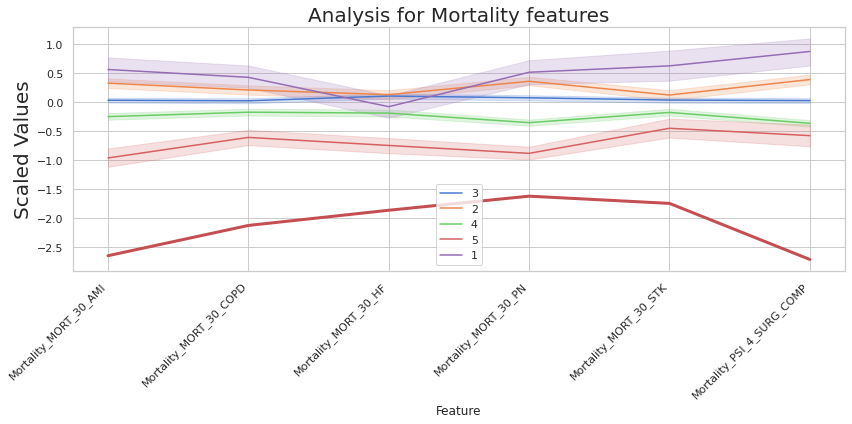

In [ ]:
# Uncomment Later
df_mortscaled = create_scaled_df(df_mast, mortality_measures)
title = 'Analysis for Mortality features'
snake_plot(df_mortscaled, title)

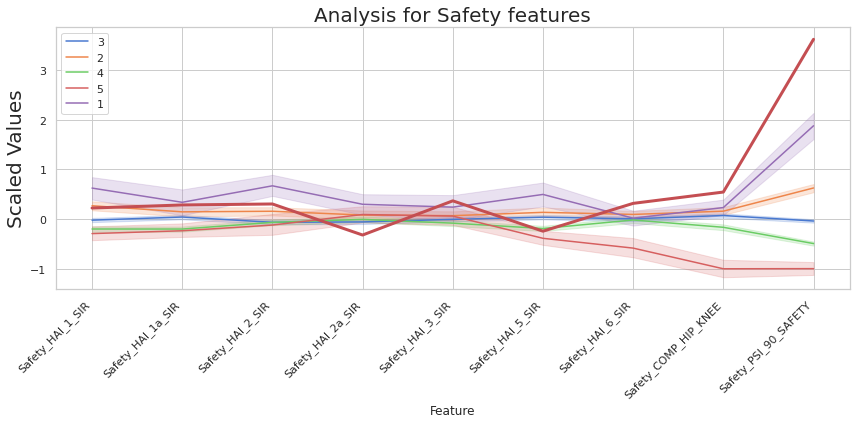

In [ ]:
# Uncomment Later
df_safetyscaled = create_scaled_df(df_mast, safety_measures)
title = 'Analysis for Safety features'
snake_plot(df_safetyscaled, title)

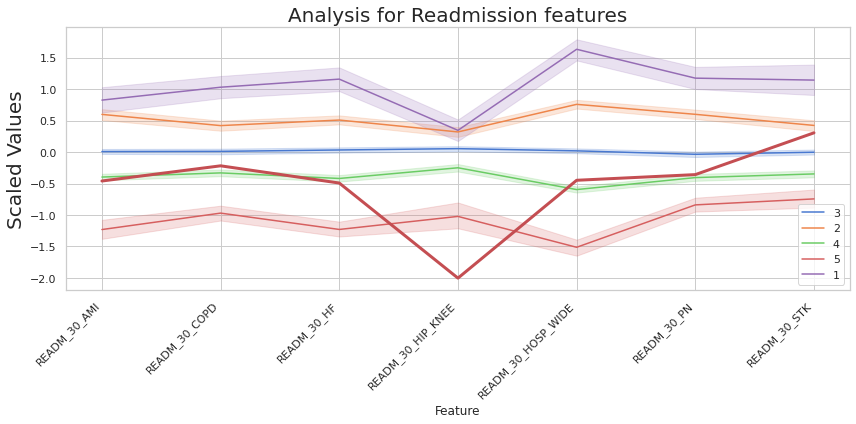

In [ ]:
# Uncomment Later
df_readmscaled = create_scaled_df(df_mast, readmission_measures)
title = 'Analysis for Readmission features'
snake_plot(df_readmscaled, title)

In [ ]:
# Uncomment later
# print (mortality_measures, safety_measures, readmission_measures,
#        experience_measures, timeliness_measures, effectiveness_measures, imaging_measures)

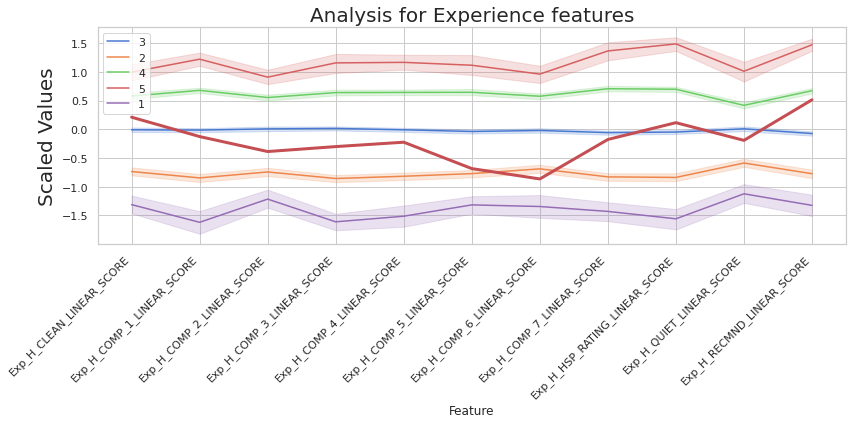

In [ ]:
# Uncomment Later
df_expscaled = create_scaled_df(df_mast, experience_measures)
title = 'Analysis for Experience features'
snake_plot(df_expscaled, title)

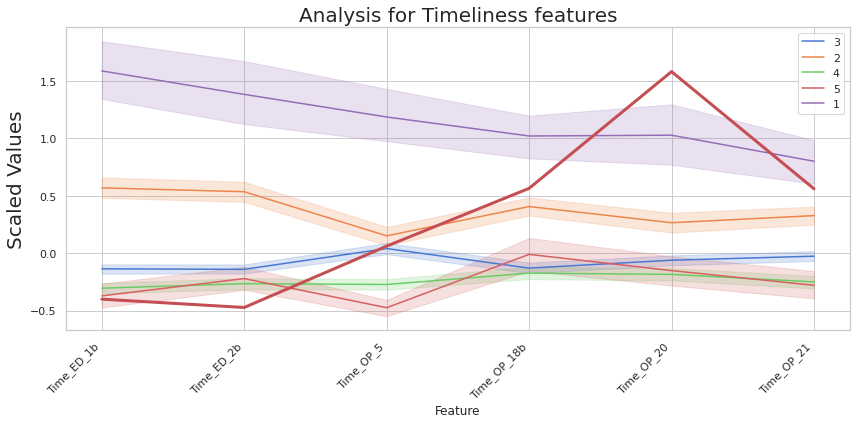

In [ ]:
# Uncomment Later
df_timescaled = create_scaled_df(df_mast, timeliness_measures)
title = 'Analysis for Timeliness features'
snake_plot(df_timescaled, title)

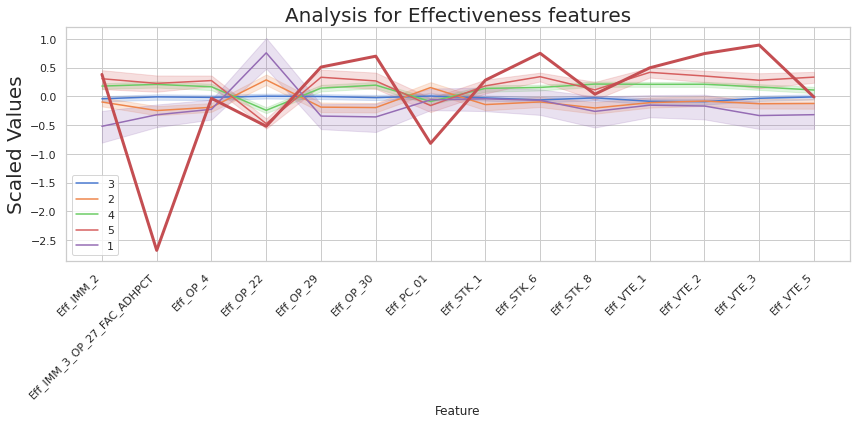

In [ ]:
# Uncomment Later
df_effscaled = create_scaled_df(df_mast, effectiveness_measures)
title = 'Analysis for Effectiveness features'
snake_plot(df_effscaled, title)

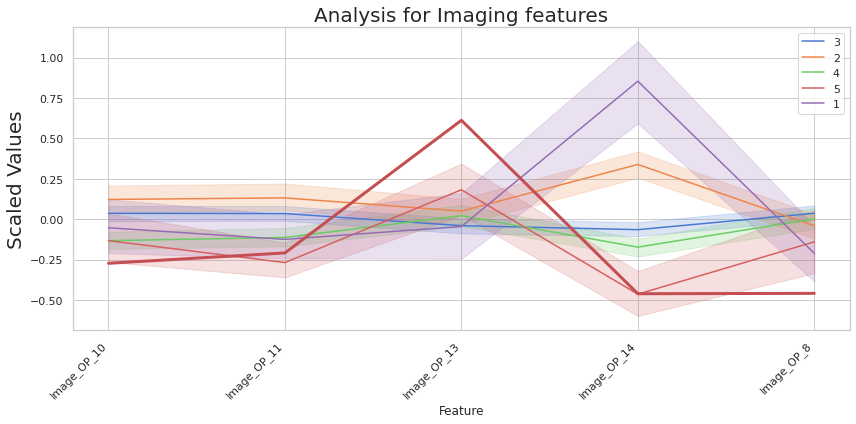

In [ ]:
# Uncomment Later
df_imagescaled = create_scaled_df(df_mast, imaging_measures)
title = 'Analysis for Imaging features'
snake_plot(df_imagescaled, title)

###  <span style="color:navy"> 4.3 Copy final combined Dataset to excel for Model Building

In [ ]:
# output clean csv
df_mast.to_csv('Combined_Master.csv', index=False)

## <span style="color:navy"> 5. Model Pre-processing

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [ ]:
# Read Customer Data
final_df = df_mast.copy()

In [ ]:
final_df = final_df.reset_index()
final_df.head()

,provider_id,hospital_overall_rating,tps_process,tps_experience,tps_outcome,tps_efficiency,tps_score,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Exp_H_CLEAN_LINEAR_SCORE,Exp_H_COMP_1_LINEAR_SCORE,Exp_H_COMP_2_LINEAR_SCORE,Exp_H_COMP_3_LINEAR_SCORE,Exp_H_COMP_4_LINEAR_SCORE,Exp_H_COMP_5_LINEAR_SCORE,Exp_H_COMP_6_LINEAR_SCORE,Exp_H_COMP_7_LINEAR_SCORE,Exp_H_HSP_RATING_LINEAR_SCORE,Exp_H_QUIET_LINEAR_SCORE,Exp_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,3,5.285714,3.750000,16.571429,2.5,28.107143,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.015530,1.427000,2.06406,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
1,10005,3,7.714286,16.250000,13.142857,2.5,39.607143,16.000000,7.6,15.5,20.8,15.500000,178.267300,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
2,10006,2,7.285714,12.250000,13.714286,5.0,38.250000,16.700000,7.1,15.6,18.2,17.900000,178.267300,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
3,10007,3,5.428571,7.000000,20.000000,0.0,32.428571,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,11.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
4,10008,3,5.943988,9.072646,33.846154,0.0,33.846154,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


In [ ]:
# Drop unwanted features
drop_features = ['tps_process', 'tps_experience', 'tps_outcome', 'tps_efficiency', 'tps_score']
final_df = final_df.drop(drop_features, axis=1)

final_df = final_df.rename(columns={'hospital_overall_rating': 'rating'})

# Drop the Provider_id column
final_df = final_df.drop('provider_id', axis=1)

In [ ]:
# final_df.columns

### <span style="color:navy"> 5.1 Train Test split and Scaling
This step includes the model pre-processing step of Train Test split and Scaling the features before Model Building

In [ ]:
# Train Test Split
# features variables in X
X = final_df.drop(['rating'], axis=1)

# Target variable in y
y = final_df['rating']

# Splitting the data into train and test data
X_train_imb, X_test, y_train_imb, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
# X_train_imb.columns

In [ ]:
# Rescaling the features before Modeling as it is sensitive to the scale of the features
scaler = MinMaxScaler()
allFeatures = X_train_imb.columns

# fit transform the scaler using the train dataset
X_train_imb[allFeatures] = scaler.fit_transform(X_train_imb[allFeatures])

# Only transform the test data set using the already fit scaler
X_test[allFeatures] = scaler.transform(X_test[allFeatures])

### <span style="color:navy"> 5.2 Handling Class Imbalance ratio

Class=3, n=1399 (47.944%)
Class=2, n=554 (18.986%)
Class=1, n=102 (3.496%)
Class=4, n=772 (26.456%)
Class=5, n=91 (3.119%)


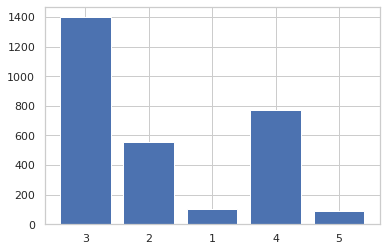

In [ ]:
# Plot the Original counts of each class
counter = Counter(y_train_imb)
for k,v in counter.items():
    per = v / len(y_train_imb) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=3, n=1399 (20.000%)
Class=2, n=1399 (20.000%)
Class=1, n=1399 (20.000%)
Class=4, n=1399 (20.000%)
Class=5, n=1399 (20.000%)


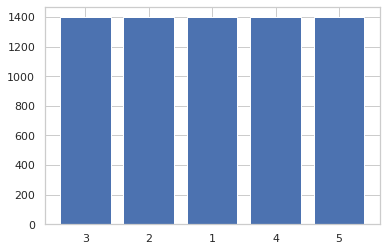

In [ ]:
# Plot the counts of each class after applying oversampling by SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_imb, y_train_imb)

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
print (X_train_imb.shape , y_train_imb.shape)

print (X_train.shape , y_train.shape)

(2918, 58) (2918,)
(6995, 58) (6995,)


## <span style="color:navy"> 6. Model Building
The final stage is the Model Building stage
    
For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. The Models trained are,
1. Logistic Regression (With StatsModels and Scikit-Learn)
2. Decision Tree (With and without hyper parameter tuning)
3. Random Forest (With and without hyper parameter tuning)

### <span style="color:navy"> 6.1 Import libraries and Define Common functions

In [ ]:
import itertools

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

In [ ]:
def getModelMetrics(model_name, y_true=False, y_pred=False):
    confusion = confusion_matrix(y_true, y_pred)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(y_true, y_pred)
    # Bal_accuracy = metrics.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)

    f1 = metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average='macro',
                          sample_weight=None, zero_division='warn')

    precision = metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='macro',
                            sample_weight=None, zero_division='warn')

    recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='macro',
                                  sample_weight=None, zero_division='warn')

    data = [[model_name, Accuracy, f1, precision , recall]]
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
    add_to_global_summary(df)
    return df

In [ ]:
consolidate_summary = pd.DataFrame()

def add_to_global_summary(df) :
    global consolidate_summary
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

### <span style="color:navy"> 6.2 Logistic Regression Model with Scikit-Learn

* Fit the model with Train dataset and Cross Validation
* Predict classes for train set and evaluate scores
* Predict classes for test dataset and evaluate scores

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(random_state=42, cv=5, multi_class='ovr')

In [ ]:
%%time
logreg.fit(X_train, y_train)

CPU times: user 31.6 s, sys: 12.2 s, total: 43.8 s
Wall time: 23.7 s


LogisticRegressionCV(cv=5, multi_class='ovr', random_state=42)

In [ ]:
y_train_pred = logreg.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_train, y_train_pred)

0.8375982844889207

#### Classification report and Confusion Matrix

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.77      0.82      0.79      1399
           3       0.65      0.57      0.61      1399
           4       0.76      0.80      0.78      1399
           5       1.00      1.00      1.00      1399

    accuracy                           0.84      6995
   macro avg       0.83      0.84      0.84      6995
weighted avg       0.83      0.84      0.84      6995



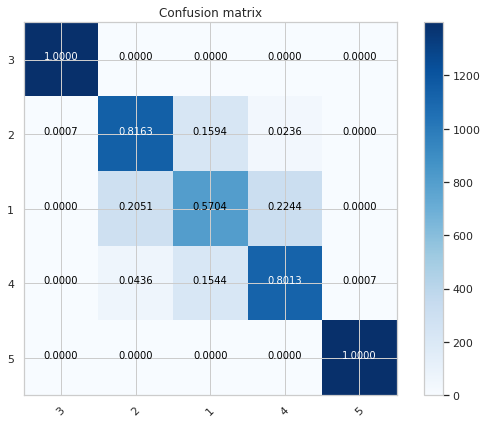

In [ ]:
y_unique = y_train.unique()
plot_confusion_matrix(cm, y_unique, title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#### Model Evaluation for Test Dataset

In [ ]:
y_test_pred = logreg.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.6273972602739726

In [ ]:
model_name = 'Logistic Regression with OVR - Train'
getModelMetrics(model_name, y_train, y_train_pred)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression with OVR - Train,0.837598,0.835467,0.834749,0.837598


In [ ]:
model_name = 'Logistic Regression with OVR - Test'
getModelMetrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression with OVR - Test,0.627397,0.68964,0.670188,0.720892


------------------

### <span style="color:navy"> 6.3 Ridge Classifier with Cross Validation

* Fit the model with Train dataset and Cross Validation
* Predict classes for train set and evaluate scores
* Predict classes for test dataset and evaluate scores

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
ridge = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)

In [ ]:
%%time
ridge.fit(X_train, y_train)

CPU times: user 1.95 s, sys: 1.17 s, total: 3.12 s
Wall time: 1.61 s


RidgeClassifierCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]), cv=5)

#### Classification report and Confusion Matrix

In [ ]:
y_train_pred = ridge.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.6843459614010007

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.72      0.92      0.81      1399
           2       0.65      0.61      0.63      1399
           3       0.70      0.37      0.48      1399
           4       0.65      0.56      0.61      1399
           5       0.69      0.96      0.80      1399

    accuracy                           0.68      6995
   macro avg       0.68      0.68      0.67      6995
weighted avg       0.68      0.68      0.67      6995



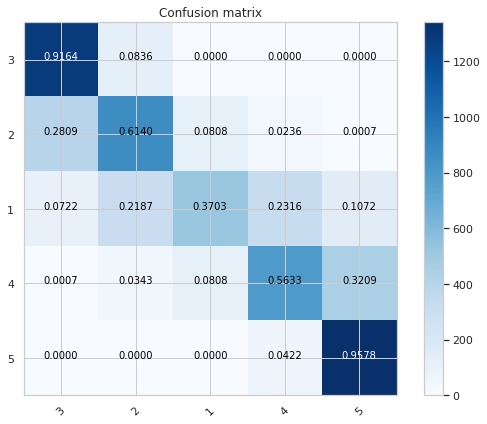

In [ ]:
plot_confusion_matrix(cm, y_unique, title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#### Model Evaluation for Train and Test Dataset

In [ ]:
y_test_pred = ridge.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.4465753424657534

In [ ]:
model_name = 'Ridge Classifier - Train'
getModelMetrics(model_name, y_train, y_train_pred)

,Model,Accuracy,F1,Precision,Recall
0,Ridge Classifier - Train,0.684346,0.665673,0.68175,0.684346


In [ ]:
model_name = 'Ridge Classifier - Test'
getModelMetrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Ridge Classifier - Test,0.446575,0.385018,0.389915,0.58881


------------------

### <span style="color:navy"> 6.4 Support Vector Classification with Cross Validation

* Fit the model with Train dataset and Cross Validation
* Predict classes for train set and evaluate scores
* Predict classes for test dataset and evaluate scores

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])

#### Define parameters for Cross Validation

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

param_grid = dict(svc__estimator__gamma=gammas, svc__estimator__C=Cs)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
svc = RandomizedSearchCV(svm_est, param_distributions=param_grid, cv=cv, n_iter=10)

In [ ]:
%%time

svc.fit(X_train, y_train)

CPU times: user 8min 30s, sys: 6.87 s, total: 8min 37s
Wall time: 8min 44s


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC()))]),
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.1,
                                                              1, 10],
                                        'svc__estimator__gamma': [0.001, 0.01,
                                                                  0.1, 1, 10]})

#### Get best Estimator for SVC

In [ ]:
svc.best_params_

{'svc__estimator__gamma': 0.01, 'svc__estimator__C': 1}

In [ ]:
svc_best = svc.best_estimator_

In [ ]:
y_train_pred = svc_best.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9662616154395998

#### Classification report and Confusion Matrix

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.96      0.98      0.97      1399
           3       0.94      0.89      0.92      1399
           4       0.94      0.96      0.95      1399
           5       1.00      1.00      1.00      1399

    accuracy                           0.97      6995
   macro avg       0.97      0.97      0.97      6995
weighted avg       0.97      0.97      0.97      6995



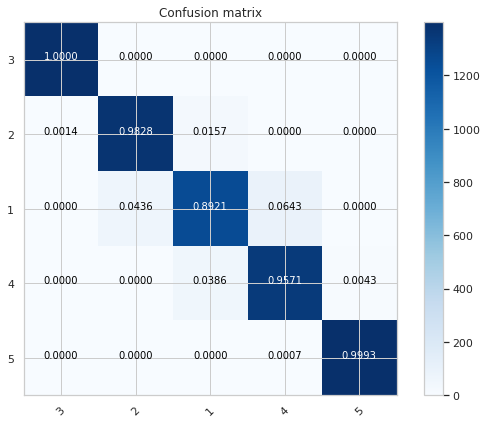

In [ ]:
plot_confusion_matrix(cm, y_unique, title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#### Model Evaluation for Train and Test Dataset

In [ ]:
y_test_pred = svc_best.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7890410958904109

In [ ]:
model_name = 'Support Vector Classification SVC - Train'
getModelMetrics(model_name, y_train, y_train_pred)

,Model,Accuracy,F1,Precision,Recall
0,Support Vector Classification SVC - Train,0.966262,0.966013,0.966156,0.966262


In [ ]:
model_name = 'Support Vector Classification SVC - Test'
getModelMetrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Support Vector Classification SVC - Test,0.789041,0.781389,0.784271,0.779424


------------------

### <span style="color:navy"> 6.5 Ensemble Methods - Random Forest Classification

* Fit the model with Train dataset and Cross Validation
* Predict classes for train set and evaluate scores
* Predict classes for test dataset and evaluate scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
hyper_params = {'max_depth': [3, 5, 10, 15],
                'max_features': [3, 5, 7],
                'min_samples_leaf': [20, 50, 100],
                'n_estimators': [20, 50, 80, 100]
               }

In [ ]:
model_rfCV = GridSearchCV(estimator=rf,
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [ ]:
%%time
model_rfCV.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: user 6.1 s, sys: 223 ms, total: 6.32 s
Wall time: 5min 44s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50, 80, 100]},
             return_train_score=True, verbose=1)

#### Get Best Estimator for Random Forest

In [ ]:
model_rfCV.best_score_

0.9529664045746962

In [ ]:
rfCV_df = pd.DataFrame(model_rfCV.cv_results_)
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']
rfCV_df.sort_values(by='rank_test_score')[sel_cols].head()

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
99,10,7,20,100,1,0.952966
135,15,7,20,100,2,0.950679
98,10,7,20,80,3,0.949964
134,15,7,20,80,4,0.949678
97,10,7,20,50,5,0.948678


In [ ]:
rf_best = model_rfCV.best_estimator_

In [ ]:
y_train_pred = rf_best.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9788420300214439

#### Classification report and Confusion Matrix

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.96      0.99      0.97      1399
           3       0.98      0.94      0.96      1399
           4       0.97      0.97      0.97      1399
           5       1.00      1.00      1.00      1399

    accuracy                           0.98      6995
   macro avg       0.98      0.98      0.98      6995
weighted avg       0.98      0.98      0.98      6995



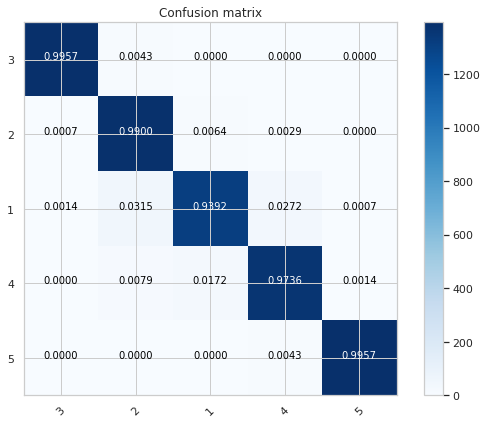

In [ ]:
plot_confusion_matrix(cm, y_unique, title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#### Model Evaluation for Train and Test Dataset

In [ ]:
y_test_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9123287671232877

In [ ]:
model_name = 'Random Forest Classification - Train'
getModelMetrics(model_name, y_train, y_train_pred)

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classification - Train,0.978842,0.978793,0.978995,0.978842


In [ ]:
model_name = 'Random Forest Classification - Test'
getModelMetrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classification - Test,0.912329,0.873514,0.893662,0.859541


------------------

### <span style="color:navy"> 6.6 Ensemble Methods - Gradient Boosting Classifier

* Fit the model with Train dataset and Cross Validation
* Predict classes for train set and evaluate scores
* Predict classes for test dataset and evaluate scores

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
%%time
gradboost.fit(X_train, y_train)

CPU times: user 14.8 s, sys: 14.7 ms, total: 14.8 s
Wall time: 14.9 s


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

#### Classification report and Confusion Matrix

In [ ]:
y_train_pred = gradboost.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       1.00      1.00      1.00      1399
           3       1.00      1.00      1.00      1399
           4       1.00      1.00      1.00      1399
           5       1.00      1.00      1.00      1399

    accuracy                           1.00      6995
   macro avg       1.00      1.00      1.00      6995
weighted avg       1.00      1.00      1.00      6995



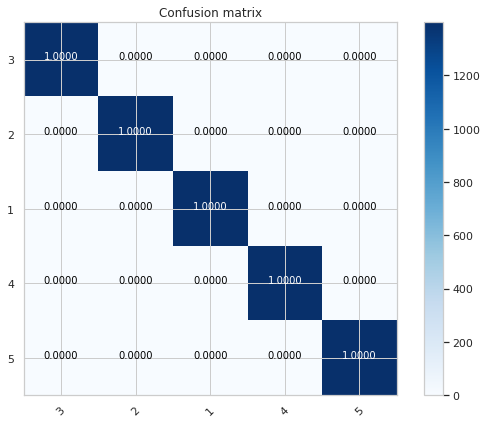

In [ ]:
plot_confusion_matrix(cm, y_unique, title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#### Model Evaluation for Train and Test Dataset

In [ ]:
y_test_pred = gradboost.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9698630136986301

In [ ]:
model_name = 'Gradient Boosting Classifier - Train'
getModelMetrics(model_name, y_train, y_train_pred)

,Model,Accuracy,F1,Precision,Recall
0,Gradient Boosting Classifier - Train,1.0,1.0,1.0,1.0


In [ ]:
model_name = 'Gradient Boosting Classifier - Test'
getModelMetrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Gradient Boosting Classifier - Test,0.969863,0.932244,0.928484,0.939982


In [ ]:
gradboost.feature_importances_

array([1.37640116e-03, 1.88579426e-03, 1.61749809e-03, 1.02472560e-02,
       5.26249981e-04, 1.11428807e-02, 0.00000000e+00, 7.17809146e-04,
       5.50145612e-06, 9.15133860e-05, 7.69235086e-03, 7.04524750e-03,
       5.74811618e-05, 8.26903396e-05, 3.77000865e-02, 2.38695906e-01,
       1.72673099e-03, 9.20104150e-05, 1.62251487e-04, 3.67368462e-02,
       1.81696851e-04, 1.54638858e-04, 1.44959911e-05, 6.47031212e-05,
       1.38387905e-04, 8.62288335e-02, 4.30333095e-04, 1.45923563e-04,
       5.70349617e-05, 5.84389761e-02, 7.17256703e-03, 1.80270944e-05,
       1.57719140e-02, 2.68292932e-05, 4.92215497e-05, 2.04919173e-01,
       8.51368405e-06, 8.96093653e-05, 6.00201111e-05, 0.00000000e+00,
       0.00000000e+00, 5.50702323e-02, 1.99294291e-05, 1.77501385e-05,
       2.24129418e-05, 1.44786034e-03, 3.47284833e-06, 1.49410353e-05,
       1.73946790e-03, 5.33872512e-05, 3.68622581e-05, 6.57387284e-05,
       9.16565115e-04, 2.27984097e-04, 2.56018720e-05, 4.86296091e-04,
      

--------------

## <span style="color:navy"> 7. Identifying the important Features and Making Recommendations

* Since the Evaluated scores are highest for the Random Forest Classifier model and Gradient Boosting Classifier, we can suggest the top 25 features ranked in order of importance as produced by these models and compare them.
* Most of these features are the features that belong to Patient Experience and Outcomes Categories
* This is similar to the findings we have observed in the EDA stage as well.

### <span style="color:navy"> 7.1 Identifying the Important Features

**Get the final important features from the final Random Forest Classifier model**

In [ ]:
# To get the most Important Features

col_sorted_by_importance= rf_best.feature_importances_.argsort()

rf_importance_df = pd.DataFrame({'Features':X.columns[col_sorted_by_importance],
                              'Importance':rf_best.feature_importances_[col_sorted_by_importance]})

# Sort the feature importances in order of their importance
rf_importance_df.sort_values(by='Importance', ascending=False, ignore_index=True, inplace=True)
rf_importance_df.head()

,Features,Importance
0,Image_OP_8,0.073664
1,READM_30_AMI,0.066665
2,Exp_H_HSP_RATING_LINEAR_SCORE,0.064129
3,Time_OP_5,0.060412
4,Safety_PSI_90_SAFETY,0.057658


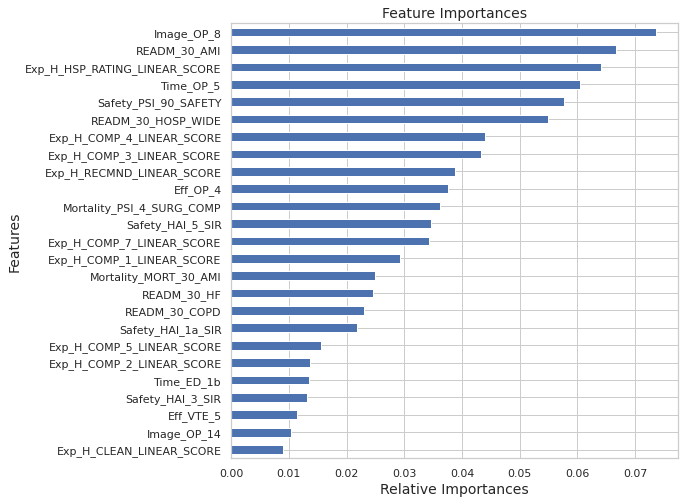

In [ ]:
numFeatures = 25

plt.figure(figsize=(8, 8))
feat_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
feat_importances.nlargest(numFeatures).sort_values().plot(kind='barh', align='center')
plt.title('Feature Importances', size=14)
plt.xlabel('Relative Importances', size=14)
plt.ylabel('Features', size=14)
plt.show()

**Get the final important features from the Gradient Boosting Classifier model**

In [ ]:
# To get the most Important Features

col_sorted_by_importance= gradboost.feature_importances_.argsort()

gb_importance_df = pd.DataFrame({'Features':X.columns[col_sorted_by_importance],
                              'Importance':gradboost.feature_importances_[col_sorted_by_importance]})

# Sort the feature importances in order of their importance
gb_importance_df.sort_values(by='Importance', ascending=False, ignore_index=True, inplace=True)
gb_importance_df.head()

,Features,Importance
0,READM_30_AMI,0.238696
1,Image_OP_8,0.205529
2,Time_OP_5,0.204919
3,Exp_H_COMP_3_LINEAR_SCORE,0.086229
4,Exp_H_COMP_7_LINEAR_SCORE,0.058439


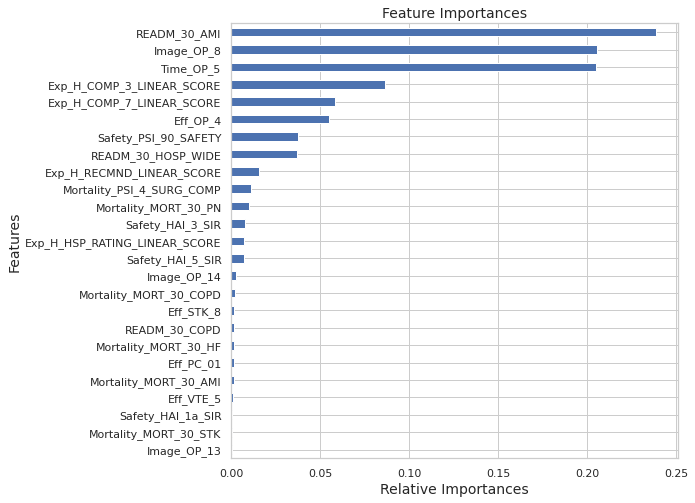

In [ ]:
numFeatures = 25

plt.figure(figsize=(8,8))
feat_importances = pd.Series(gradboost.feature_importances_, index=X.columns)
feat_importances.nlargest(numFeatures).sort_values().plot(kind='barh', align='center')
plt.title('Feature Importances', size=14)
plt.xlabel('Relative Importances', size=14)
plt.ylabel('Features', size=14)
plt.show()

### <span style="color:navy"> 7.2 Observations and Inferences

Doing well under all the categories can help achieve a high score in the Star Ratings Program. However, when limited resources make it difficult to prioritize everything, focus should be on quality improvement efforts on outcomes over processes.
* **Adopt a broad quality improvement strategy.**
  Evanston Hospital should do best to drive their quality strategy by optimizing patient outcomes and experiences, quality areas that CMS consistently weights more heavily and that show the highest variation among hospitals.
* **Invest in technology and analytics tools to support quality improvement goals.**
  Understanding the main drivers behind a hospital’s performance in the areas of mortality, readmission, patient safety, and patient experience will likely be critical to improving quality broadly. weights more heavily and that show the highest variation among hospitals.
* **Improving specific key areas will help improve overall quality.**
  Investing in tools that enable individual clinicians to understand their performance in the key areas may help hospitals improve quality overall.
* **Develop and promote a culture of quality improvement among individual clinicians.**
  Individual clinicians drive the overall quality of services performed in a hospital. Thus, it is important to help them understand that they are a critical component of quality improvement. Hospital leadership should consider helping clinicians understand which areas need improvement and how they fit into the overall quality strategy.


### <span style="color:navy"> 7.3 Suggestions

Get the Features suggested important by the Gradient Boosting Classifier and Random Forest Classifier in order of their importance and see how the Evanston Hospital is faring in those features

Observations from the below chart:
1. **Mortality Measures** - The Provider Evanston Hospital has scores better than National Average for Mortality Measures.
2. **Safety Measures** - Evanston Hospital should improve the quality measures in the Safety Measures.
3. **Readmission Score** - Evanston Hospital has scores better than National Average for Readmission Measures.
4. **Patient Experience** - Evanston Hospital should improve the quality measures under Patient Experience Categories.
5. **Effectiveness Measures** - The Performance of Evanston Hospital is about the same as National Average for Effectiveness Measures

In [ ]:
df_features = pd.concat([gb_importance_df[:15], rf_importance_df[:15]], axis=0, ignore_index=True)
#df_features.head()

In [ ]:
df_features1 = df_features.sort_values(by=['Importance']).drop_duplicates(subset=['Features'], keep='last')
df_features1 = df_features1.sort_values(by=['Importance'], ascending=False)
df_features1.reset_index(inplace=True)
df_features1.drop('index', axis=1, inplace=True)

In [ ]:
df_features1.head()

,Features,Importance
0,READM_30_AMI,0.238696
1,Image_OP_8,0.205529
2,Time_OP_5,0.204919
3,Exp_H_COMP_3_LINEAR_SCORE,0.086229
4,Exp_H_HSP_RATING_LINEAR_SCORE,0.064129


In [ ]:
df_dataDict.head()

,measure_id,measure_name,size
0,Mortality_MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Mortality Rate,4818
1,Mortality_MORT_30_CABG,Death rate for CABG,4818
2,Mortality_MORT_30_COPD,Death rate for chronic obstructive pulmonary disease (COPD) patients,4818
3,Mortality_MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,4818
4,Mortality_MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,4818


In [ ]:
df_features1 = pd.merge(left=df_features1, right=df_dataDict, left_on='Features',right_on='measure_id', how='left')
df_features1.head(3)

,Features,Importance,measure_id,measure_name,size
0,READM_30_AMI,0.238696,READM_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Readmission Rate,4818
1,Image_OP_8,0.205529,Image_OP_8,MRI Lumbar Spine for Low Back Pain,4818
2,Time_OP_5,0.204919,Time_OP_5,Median Time to ECG,4818


In [ ]:
final_features =  df_features1['Features'].values.tolist()
#final_features

In [ ]:
df_ddfinal = df_features1[df_features1['Features'].isin(final_features)].drop_duplicates()
df_ddfinal.reset_index(inplace=True)
df_ddfinal.drop(['index','measure_id','size'], axis=1, inplace=True)
df_ddfinal.sort_values(by='Importance', ascending=False, ignore_index=True, inplace=True)
df_ddfinal

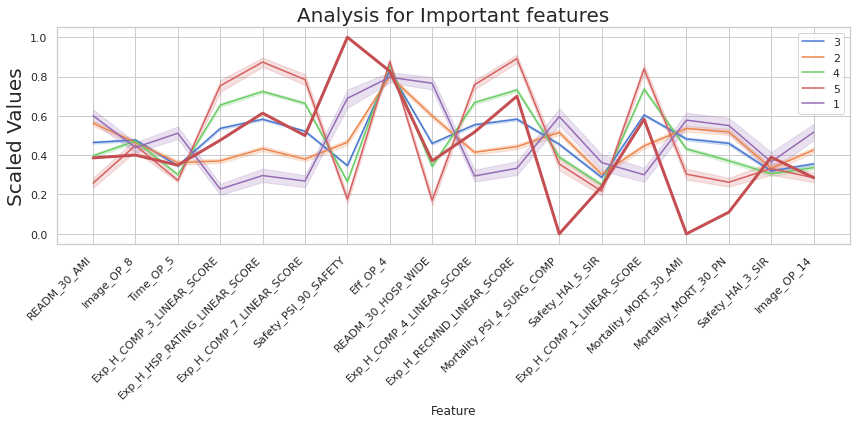

In [ ]:
# Uncomment Later
features_scaled = create_scaled_df(df_mast, final_features)
title = 'Analysis for Important features'
snake_plot(features_scaled, title)

### <span style="color:navy"> 7.4 Final Model scores for reference
    
The Evaluation scores of the different models with train and test datasets are consolidated here
As we can see, the Random Forest Classifier and Gradient Boost Classifier seem to have good overall Scores

In [ ]:
# The final model scores are consolidated here

consolidate_summary

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression with OVR - Train,0.837598,0.835467,0.834749,0.837598
1,Logistic Regression with OVR - Test,0.627397,0.689640,0.670188,0.720892
2,Ridge Classifier - Train,0.684346,0.665673,0.681750,0.684346
3,Ridge Classifier - Test,0.446575,0.385018,0.389915,0.588810
4,Support Vector Classification SVC - Train,0.966262,0.966013,0.966156,0.966262
5,Support Vector Classification SVC - Test,0.789041,0.781389,0.784271,0.779424
6,Random Forest Classification - Train,0.978842,0.978793,0.978995,0.978842
7,Random Forest Classification - Test,0.912329,0.873514,0.893662,0.859541
8,Gradient Boosting Classifier - Train,1.000000,1.000000,1.000000,1.000000
9,Gradient Boosting Classifier - Test,0.969863,0.932244,0.928484,0.939982


------------------